SENTIMENT ANALYSIS

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("C:/Users/durga/Desktop/SPU/DS 600/PROJECT/FINAL/cleaned_data.csv")

In [3]:
df.head()

,Name,Profile ID,Date,Comment,Comment_Length
0,scotty2jatty,3.982741e+08,22/04/24 05:27:52,better jakepaul dirty,34.0
1,angelasanders975,6.596329e+10,22/04/24 17:43:49,thats soooooooooo right,24.0
2,myleslewis_24,1.168729e+10,22/04/24 17:49:54,bro want shirt,21.0
3,matthew_williams224,2.524021e+10,22/04/24 18:53:42,michaelgalt bro needs beat jakes ass,60.0
4,vremyatherapper,3.178600e+09,22/04/24 19:21:58,mike tko,28.0


In [4]:
from afinn import Afinn

In [5]:
affin = Afinn()

In [8]:
scores = [affin.score(article) for article in df['Comment']]
sentiment = ['positive' if score > 0
                          else 'negative' if score < 0
                              else 'neutral'
                                  for score in scores]

In [9]:
data = pd.DataFrame()
data['topic'] =  df['Comment']
data['scores'] = scores
data['sentiments'] = sentiment
print(data)

                                        topic  scores sentiments
0                       better jakepaul dirty     0.0    neutral
1                     thats soooooooooo right     0.0    neutral
2                              bro want shirt     1.0   positive
3        michaelgalt bro needs beat jakes ass    -4.0   negative
4                                    mike tko     0.0    neutral
...                                       ...     ...        ...
1618                                 pretty u     1.0   positive
1619              she smiling carnivore plant     2.0   positive
1620                     lifewithangela where     0.0    neutral
1621  muratserter okay sure lonely person hon    -2.0   negative
1622                     toxiiiic douchecanoe     0.0    neutral

[1623 rows x 3 columns]


In [10]:
data.head()

,topic,scores,sentiments
0,better jakepaul dirty,0.0,neutral
1,thats soooooooooo right,0.0,neutral
2,bro want shirt,1.0,positive
3,michaelgalt bro needs beat jakes ass,-4.0,negative
4,mike tko,0.0,neutral


In [11]:
data.head(n=30)

,topic,scores,sentiments
0,better jakepaul dirty,0.0,neutral
1,thats soooooooooo right,0.0,neutral
2,bro want shirt,1.0,positive
3,michaelgalt bro needs beat jakes ass,-4.0,negative
4,mike tko,0.0,neutral
5,t shirt though,0.0,neutral
6,yeah boy tysons gonna get shit done goat,-3.0,negative
7,please win mike,5.0,positive
8,want t shirt,1.0,positive
9,love shirt,3.0,positive


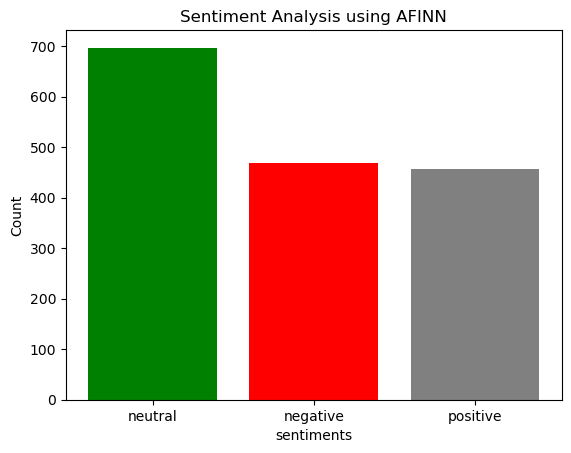

In [13]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = data['sentiments'].value_counts()

# Plot the bar chart
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'gray'])
plt.xlabel('sentiments')
plt.ylabel('Count')
plt.title('Sentiment Analysis using AFINN')
plt.show()

MODEL IMPLEMENTATION - LOGISTIC REGRESSION

In [25]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd

# Assuming df is your DataFrame containing the data
comments = data['topic']
sentiments = data['sentiments']

# Feature Hashing
vectorizer = HashingVectorizer(n_features=1000)  # Adjust n_features as needed
X = vectorizer.fit_transform(comments)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, sentiments, test_size=0.2, random_state=42)

In [27]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [34]:
y_pred = model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.66      0.41      0.51       100
     neutral       0.60      0.84      0.70       136
    positive       0.60      0.48      0.53        89

    accuracy                           0.61       325
   macro avg       0.62      0.58      0.58       325
weighted avg       0.62      0.61      0.59       325



MODEL - SUPPORT VECTOR MACHINE

In [29]:
from sklearn.svm import SVC

# Model Training
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Model Evaluation
svm_y_pred = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, svm_y_pred))

SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.61      0.46      0.52       100
     neutral       0.62      0.82      0.71       136
    positive       0.61      0.48      0.54        89

    accuracy                           0.62       325
   macro avg       0.61      0.59      0.59       325
weighted avg       0.61      0.62      0.60       325



MODEL - RANDOM FOREST

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Model Training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation
rf_y_pred = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       0.67      0.40      0.50       100
     neutral       0.64      0.85      0.73       136
    positive       0.60      0.56      0.58        89

    accuracy                           0.63       325
   macro avg       0.64      0.60      0.60       325
weighted avg       0.64      0.63      0.62       325

